Luan Rodrigues Petruitis GU3008347

In [12]:
from datetime import datetime
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import petl as etl
%matplotlib inline

# Configurações do para realizar os plots
plt.rc('font', size=12)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)

np.random.seed(42)

# Preparando os dados
dataset_investidores = pd.read_csv("./InvestidoresTesouroDireto.csv", encoding='cp1252', on_bad_lines='skip')

# print(dataset_investidores)

dataset_investidores = dataset_investidores.loc[:, ~dataset_investidores.columns.str.contains('^Unnamed')]
# dataset_investidores.head()
# Pegando a variável base e o alvo

def mes(data):
    month = datetime.strptime(data, "%d/%m/%Y").year
    return month
    # if month >= 1 and month <= 3:
    #     return 1  
    # elif month >= 4 and month <= 6:
    #     return 2  
    # elif month >= 7 and month <= 9:
    #     return 3  
    # else:
    #     return 4
        

dataset_investidores["data"] = dataset_investidores["Data de Adesao"].apply(mes)


Indices=[]
for x in dataset_investidores.index:
    try:
        idade_formated = int(dataset_investidores.Idade[x])
    except:
        Indices.append(x)    

dataset_investidores = dataset_investidores.drop(Indices)
dataset_investidores["Idade"] = dataset_investidores["Idade"].astype(int)


# X = dataset_investidores[["mes"]].values # base
# print("Base:", X)
# y = dataset_investidores[["Idade"]].values # alvo
# print("Alvo:", y)

dataset_investidores_data = dataset_investidores.groupby("Data de Adesao")


In [25]:
dataset_investidores.describe().head(40)

total_investidor_mes = dataset_investidores_data.describe()["Codigo do Investidor"][["count"]]
total_investidor_mes

,count
Data de Adesao,
01/01/1900,24878.0
01/01/2014,1.0
01/01/2016,2.0
01/01/2017,1.0
01/02/2010,6.0
...,...
31/10/2017,152.0
31/10/2018,302.0
31/10/2019,280.0


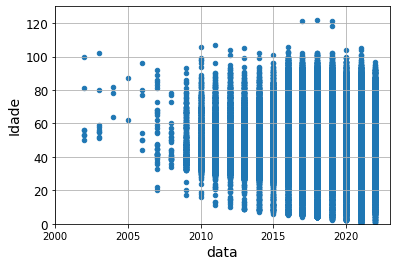

In [24]:

# Gráfico com os dados
dataset_investidores.plot(x="data", y="Idade", kind='scatter', grid=True)
plt.axis([2000, 2023, 0, 130])
plt.show()


# # Selecione o modelo de regressão
# model = LinearRegression()
# # treinando modelo de regressão linear
# model.fit(X, y)

# # Fazer uma previsão para o chipre
# X_new = [[37_655.2]] # Pib per capita de Chipre em 2020

# # Predizendo valores com o modelo treinado
# print(model.predict(X_new))